In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import torch
from sklearn.metrics import r2_score

import constant
from constant import org_cols, wsr_cols, geo_cols, semigeo_cols
import myplot
from models import model_evaluation, model_improvement, get_days_error, NRMSE_all
path = "PH_SC_1/"
model_path = constant.model_path + path
plot_path = constant.plot_path + path
error_path = constant.error_path + path


In [2]:
%load_ext autoreload

# Evaluation

## load evaluation data, models, features

In [3]:
df_evl = pd.read_parquet(constant.PH_SC_EVL_path)
df_evl["TIME_CET"] = pd.to_datetime(df_evl["TIME_CET"])

In [4]:
model_original = torch.load(model_path + "original_model.pth")
model_wsr = torch.load(model_path + "wsr_model.pth")
model_geo = torch.load(model_path + "geo_model.pth")
model_semigeo = torch.load(model_path + "semigeo_model.pth")

In [5]:
original_errs= get_days_error(df_evl, model_original, org_cols)
wsr_errs= get_days_error(df_evl, model_wsr, wsr_cols)
geo_errs= get_days_error(df_evl, model_geo, geo_cols)
semigeo_errs= get_days_error(df_evl, model_semigeo, semigeo_cols)

In [6]:
original_NRMSE_all  = NRMSE_all(original_errs)
wsr_NRMSE_all = NRMSE_all(wsr_errs)
geo_NRMSE_all = NRMSE_all(geo_errs)
semigeo_NRMSE_all = NRMSE_all(semigeo_errs)

In [7]:
print(original_NRMSE_all)
print(wsr_NRMSE_all)
print(geo_NRMSE_all)
print(semigeo_NRMSE_all)

57.11001192786633
10.645473117775191
17.20362710879658
10.733084462398807


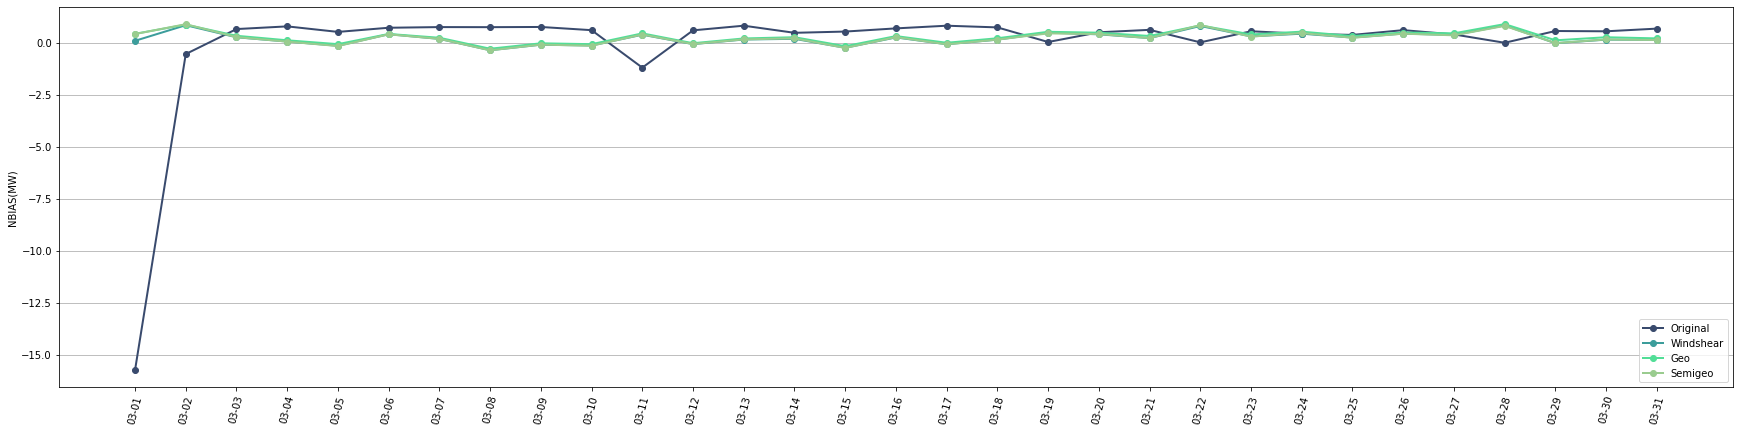

In [8]:
myplot.timelines(original_errs.index, 
{"Original":original_errs["NBIAS"], "Windshear":wsr_errs["NBIAS"], "Geo":geo_errs["NBIAS"], "Semigeo":semigeo_errs["NBIAS"]}, ylabel="NBIAS(MW)", fulltime=False)

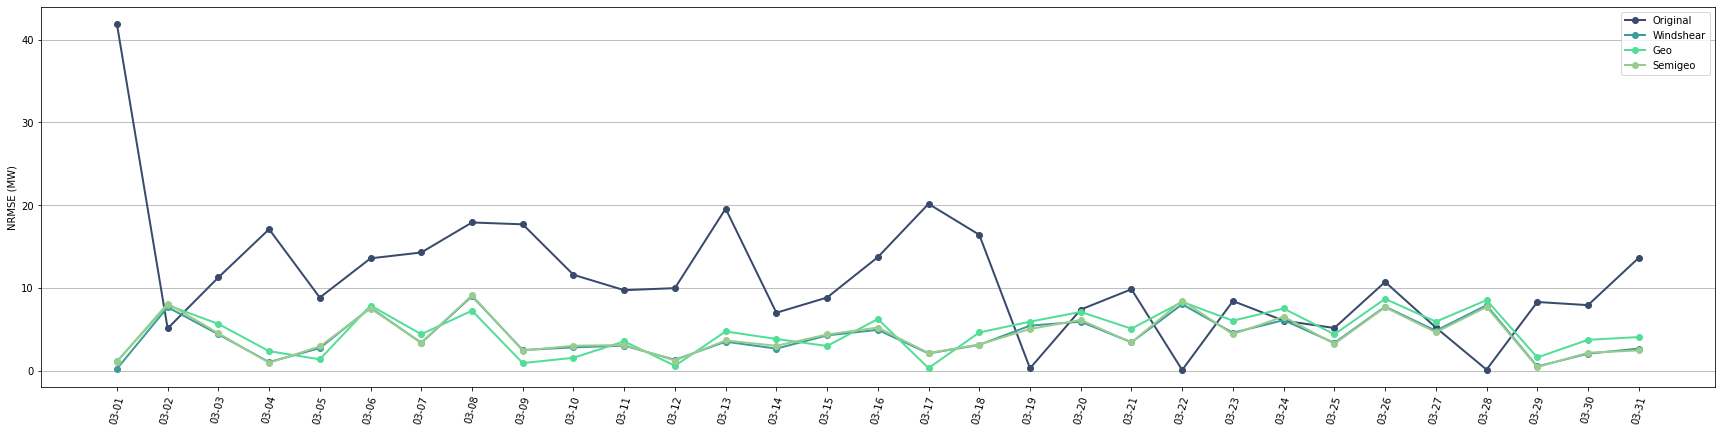

In [9]:
myplot.timelines(original_errs.index, 
{"Original":original_errs["NRMSE"], "Windshear":wsr_errs["NRMSE"], "Geo":geo_errs["NRMSE"], "Semigeo":semigeo_errs["NRMSE"]}, ylabel="NRMSE (MW)", fulltime=False)

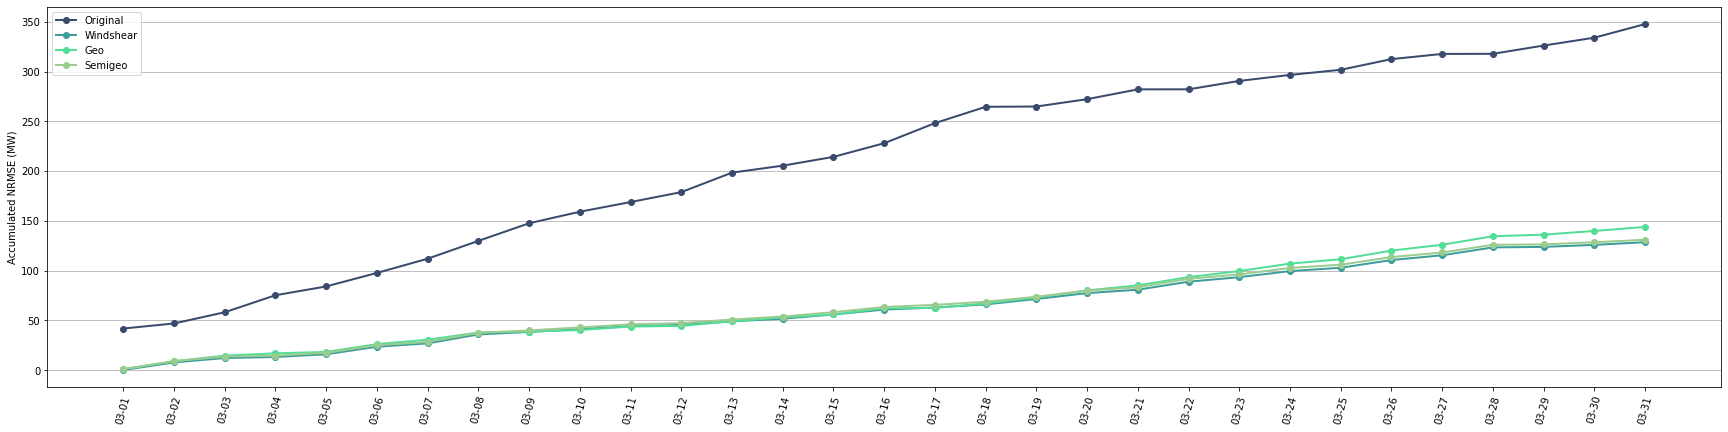

In [10]:
myplot.timelines(original_errs.index, 
{"Original":original_errs["NRMSE_CUM"], "Windshear":wsr_errs["NRMSE_CUM"], "Geo":geo_errs["NRMSE_CUM"], "Semigeo":semigeo_errs["NRMSE_CUM"]}, ylabel="Accumulated NRMSE (MW)", fulltime=False)

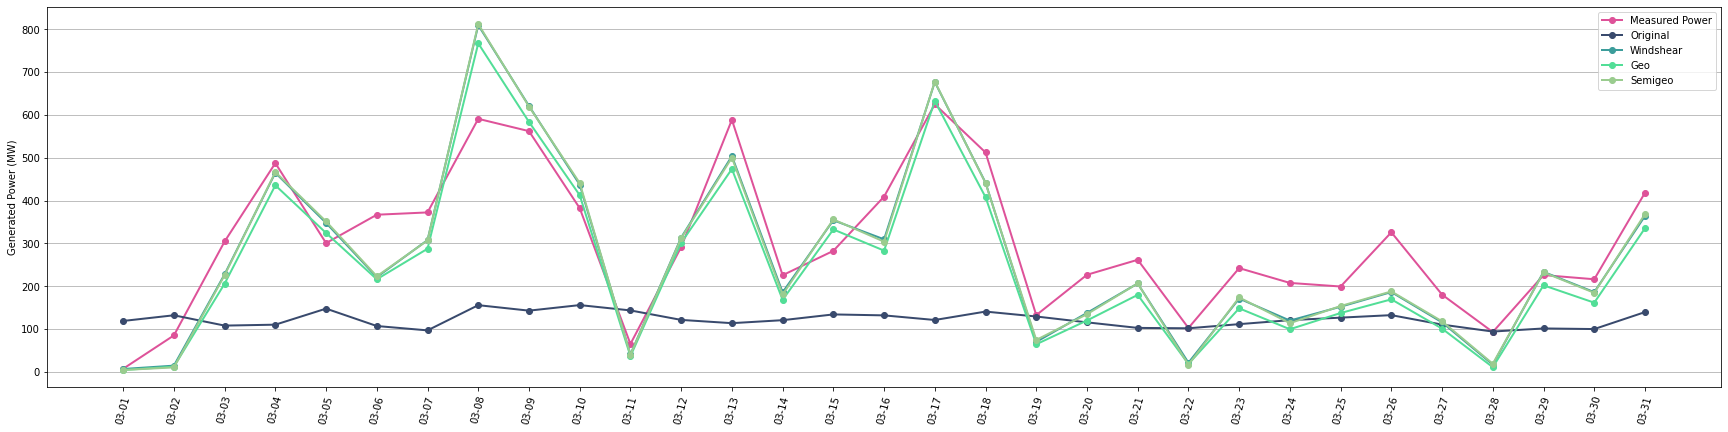

In [11]:
myplot.timelines(original_errs.index, 
{"Measured Power":original_errs["VAERDI"], "Original":original_errs["pred"], "Windshear":wsr_errs["pred"], "Geo":geo_errs["pred"], "Semigeo":semigeo_errs["pred"]}, ylabel="Generated Power (MW)", fulltime=False)

#### Model Comparement

In [12]:
imp_NRMSE, r2 = model_improvement({"Original": original_errs, "Windshear": wsr_errs, "Geo": geo_errs, "Semigeo": semigeo_errs}, "NRMSE")
r2

{'Original': -1.133, 'Windshear': 0.762, 'Geo': 0.722, 'Semigeo': 0.757}

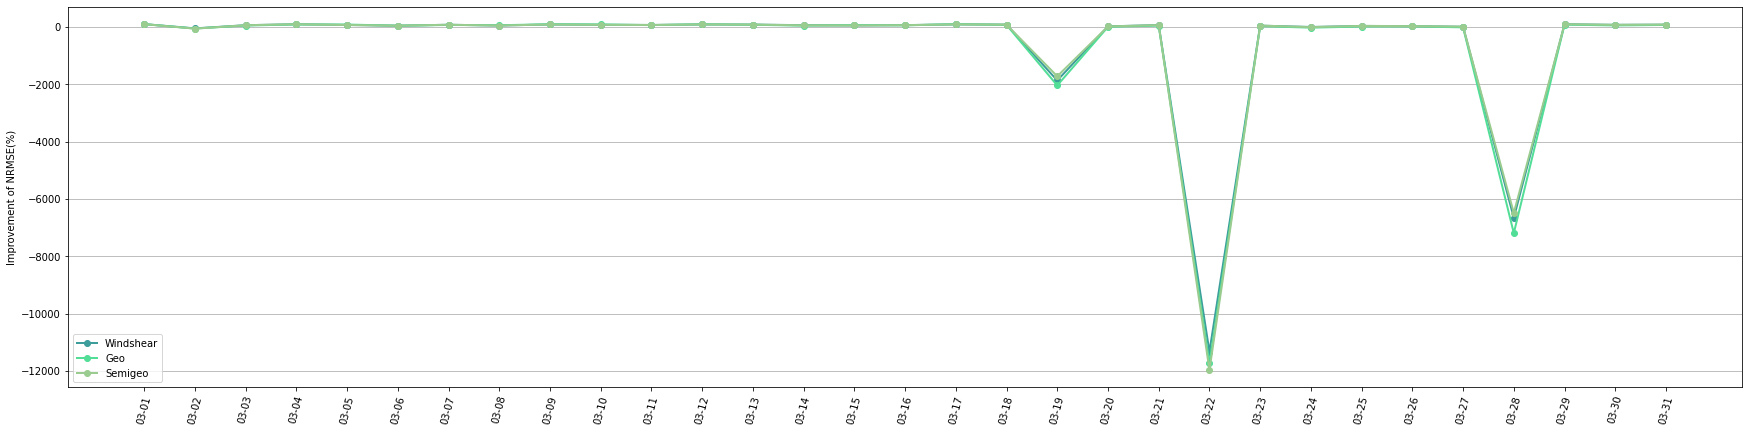

In [13]:
myplot.timelines(original_errs.index, 
{"Windshear":imp_NRMSE["Windshear"]["Original"], "Geo":imp_NRMSE["Geo"]["Original"], "Semigeo":imp_NRMSE["Semigeo"]["Original"]}, ylabel="Improvement of NRMSE(%)", fulltime=False)

In [14]:
imp_NRMSE_CUM, r2 = model_improvement({"Original": original_errs, "Windshear": wsr_errs, "Geo": geo_errs, "Semigeo": semigeo_errs}, "NRMSE_CUM")
r2

{'Original': -1.133, 'Windshear': 0.762, 'Geo': 0.722, 'Semigeo': 0.757}

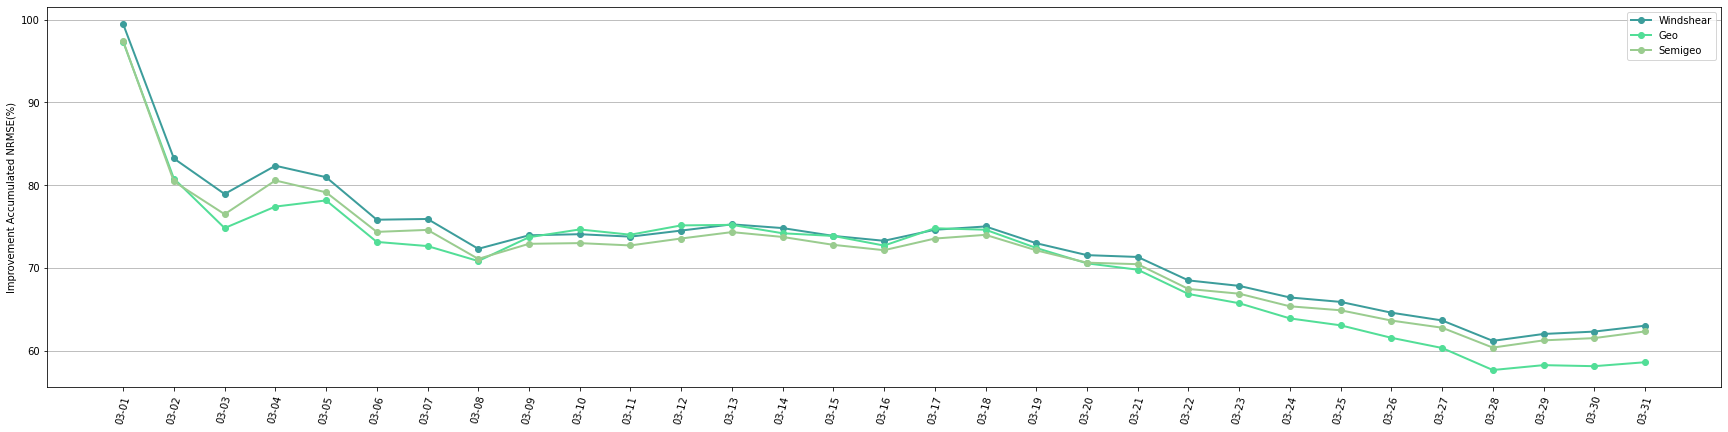

In [15]:
myplot.timelines(original_errs.index, 
{"Windshear":imp_NRMSE_CUM["Windshear"]["Original"], "Geo":imp_NRMSE_CUM["Geo"]["Original"], "Semigeo":imp_NRMSE_CUM["Semigeo"]["Original"]}, ylabel="Improvement Accumulated NRMSE(%)", fulltime=False)